<a href="https://colab.research.google.com/github/elaineleiyoung/statistical-arbitrage/blob/main/statistical_arbitrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistical Arbitrage Model: 
Pairs trading is a special form of statistical arbitrage where a portfolio has only two stocks. By combining two cointegrated stocks, we can construct a spread that is mean-reverting, even when these two stocks themselves are not. 
1.   Collect historical data on two stocks
2.   Test for Cointegration
3.   Calculate the spread
4.   Trading Strategy
5.   Backtesting



In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.5 MB/s eta 0:00:00


### Downloading Market Data

In [ ]:
import yfinance as yf
import datetime

# Set the ticker symbols for Bitcoin and Ethereum
tickers = ['BTC-USD', 'ETH-USD']

# Download market data from Yahoo Finance
data = yf.download(tickers, start="2019-01-01", end="2022-02-22")
startdate = datetime.datetime(2019, 1, 1)
todate = datetime.datetime(2022, 2, 22)

# Extract the adjusted close prices for Bitcoin and Ethereum
btc_prices = data['Adj Close']['BTC-USD']
eth_prices = data['Adj Close']['ETH-USD']

print(btc_prices)
print(eth_prices)

[*********************100%***********************]  2 of 2 completed
Date
2019-01-01     3843.520020
2019-01-02     3943.409424
2019-01-03     3836.741211
2019-01-04     3857.717529
2019-01-05     3845.194580
                  ...     
2022-02-17    40538.011719
2022-02-18    40030.976562
2022-02-19    40122.156250
2022-02-20    38431.378906
2022-02-21    37075.281250
Name: BTC-USD, Length: 1148, dtype: float64
Date
2019-01-01     140.819412
2019-01-02     155.047684
2019-01-03     149.135010
2019-01-04     154.581940
2019-01-05     155.638596
                 ...     
2022-02-17    2881.481934
2022-02-18    2785.727539
2022-02-19    2763.701172
2022-02-20    2628.648438
2022-02-21    2573.816162
Name: ETH-USD, Length: 1148, dtype: float64


### Analyzing Data

In [ ]:
# calculating price difference: 
# subtract the daily closing price of Ethereum from the daily closing price of Bitcoin to get the price difference between the two assets
price_diff = btc_prices - eth_prices
print(price_diff)

Date
2019-01-01     3702.700607
2019-01-02     3788.361740
2019-01-03     3687.606201
2019-01-04     3703.135590
2019-01-05     3689.555984
                  ...     
2022-02-17    37656.529785
2022-02-18    37245.249023
2022-02-19    37358.455078
2022-02-20    35802.730469
2022-02-21    34501.465088
Length: 1148, dtype: float64


### Plotting price difference

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

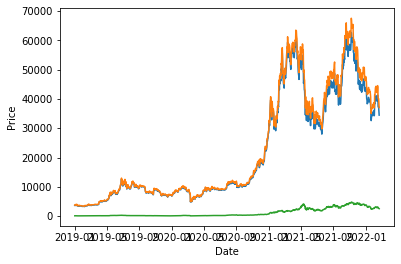

In [ ]:
#graphing the prices and the difference between the prices
df = pd.DataFrame(data=price_diff)
dfb = pd.DataFrame(data=btc_prices)
dfe = pd.DataFrame(data=eth_prices)
plt.plot(df)
plt.plot(dfb)
plt.plot(dfe)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [1]:
#z-score test: use z-score test of ratio between two stock prices, generate trading signals AND upper/lower thresholds
#if positive relative to population mean value, value is above upper thresholds, then stock price is higher than average price
#therefore, we want to short this!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#calculate z-score
def zscore(series):
  return (series - series.mean())/np.std(series)

#create a dataframe for trading signals
signals = pd.DataFrame()
signals['BTC-USD'] = dfb
signals['ETH-USD'] = dfe

display(signals)

ratios = signals.'BTC-USD'/signals.ETH-USD

#calculate z-score
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) + np.std(signals['z'])

signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1,1], default=0) 

#take first order differences to obtain portfolio positions
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

#verify dataframe head and tail
signals.head(3).append(signals.tail(3))

# visualize trading signals and position
fig = plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)
bx2 = bx.twinx()

l1, = bx.plot(signals['BTC-USD'], c='#4abdac')
l2, = bx2.plot(signals['ETH-USD'], c='#907163')

u1, = bx.plot(signals['BTC-USD'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g', alpha=0.7)



SyntaxError: ignored

NameError: ignored